<a href="https://colab.research.google.com/github/advantgarde/Data-Analytics-Microcredential/blob/main/Python%20Projects/Daniel_Li_COVID19_DATA_ANALYSIS_CLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__

:Import all required libraries that are needed for data analysis

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [190]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

In [191]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [192]:
df.tail()

,date,county,state,fips,cases,deaths
2141655,2022-01-22,Sweetwater,Wyoming,56037.0,9449,114.0
2141656,2022-01-22,Teton,Wyoming,56039.0,8814,14.0
2141657,2022-01-22,Uinta,Wyoming,56041.0,4927,34.0
2141658,2022-01-22,Washakie,Wyoming,56043.0,2024,41.0
2141659,2022-01-22,Weston,Wyoming,56045.0,1349,16.0


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141660 entries, 0 to 2141659
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   date    object 
 1   county  object 
 2   state   object 
 3   fips    float64
 4   cases   int64  
 5   deaths  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 98.0+ MB


In [194]:
df.shape

(2141660, 6)

In [195]:
df.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

In [196]:
#filter the county to just New York City
#view the earliest cases
nyc_df = df[df['county']=='New York City']
nyc_df.head(7)

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0.0
448,2020-03-02,New York City,New York,NaN,1,0.0
482,2020-03-03,New York City,New York,NaN,2,0.0
518,2020-03-04,New York City,New York,NaN,2,0.0
565,2020-03-05,New York City,New York,NaN,4,0.0
627,2020-03-06,New York City,New York,NaN,5,0.0
715,2020-03-07,New York City,New York,NaN,12,0.0


In [197]:
#view the most recent cases 
nyc_df.tail(7)

,date,county,state,fips,cases,deaths
2120760,2022-01-16,New York City,New York,NaN,2109910,36509.0
2124012,2022-01-17,New York City,New York,NaN,2123721,36698.0
2127264,2022-01-18,New York City,New York,NaN,2134609,36949.0
2130518,2022-01-19,New York City,New York,NaN,2145910,37122.0
2133770,2022-01-20,New York City,New York,NaN,2159384,37228.0
2137024,2022-01-21,New York City,New York,NaN,2171659,37364.0
2140281,2022-01-22,New York City,New York,NaN,2185081,37364.0


In [198]:
#to find the number of elements in the columns
nyc_df.count()

date      693
county    693
state     693
fips        0
cases     693
deaths    693
dtype: int64

In [199]:
#find the number of NaN in a column
nyc_df.isnull().sum()

date        0
county      0
state       0
fips      693
cases       0
deaths      0
dtype: int64

In [200]:
#drop the column of NaN's
nyc_df = nyc_df.drop('fips', inplace=False, axis=1)

In [201]:
#just to check if index is unique
nyc_df.index.is_unique

True

In [202]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 416 to 2140281
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    693 non-null    object 
 1   county  693 non-null    object 
 2   state   693 non-null    object 
 3   cases   693 non-null    int64  
 4   deaths  693 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 52.5+ KB


In [203]:
#find out when first death in NYC occurred 
nyc_first_death = nyc_df[nyc_df['deaths']!=0]
nyc_first_death.head()

,date,county,state,cases,deaths
2163,2020-03-14,New York City,New York,269,1.0
2574,2020-03-15,New York City,New York,330,5.0
3033,2020-03-16,New York City,New York,464,7.0
3549,2020-03-17,New York City,New York,646,11.0
4150,2020-03-18,New York City,New York,1344,25.0


In [204]:
#overall description of the data stats, some may not be accurate due to cases and death being cumulative
nyc_df.describe()

,cases,deaths
count,6.930000e+02,693.000000
mean,6.535853e+05,26824.154401
std,4.562990e+05,8531.655278
min,1.000000e+00,0.000000
25%,2.362690e+05,23643.000000
50%,6.501230e+05,27949.000000
75%,9.782410e+05,33545.000000
max,2.185081e+06,37364.000000


In [205]:
#the maximum cases and deaths in NYC as of today
nyc_df.max()

date         2022-01-22
county    New York City
state          New York
cases           2185081
deaths            37364
dtype: object

In [206]:
#number of new cases each day
new_cases = nyc_df['cases'].diff()
for index, row in nyc_df.iterrows():
  nyc_df.append(new_cases)

In [207]:
nyc_df['new_cases'] = new_cases
nyc_df.head()

,date,county,state,cases,deaths,new_cases
416,2020-03-01,New York City,New York,1,0.0,NaN
448,2020-03-02,New York City,New York,1,0.0,0.0
482,2020-03-03,New York City,New York,2,0.0,1.0
518,2020-03-04,New York City,New York,2,0.0,0.0
565,2020-03-05,New York City,New York,4,0.0,2.0


In [208]:
#check if other null values other than the one we see in the dataframe above
nyc_df.isnull().sum()

date         0
county       0
state        0
cases        0
deaths       0
new_cases    1
dtype: int64

In [209]:
#we know the first case happened on 03/01/2020 so we can going in there and fill in the new case as 1
nyc_df.loc[416, 'new_cases'] = 1
nyc_df_1 = nyc_df
nyc_df_1

,date,county,state,cases,deaths,new_cases
416,2020-03-01,New York City,New York,1,0.0,1.0
448,2020-03-02,New York City,New York,1,0.0,0.0
482,2020-03-03,New York City,New York,2,0.0,1.0
518,2020-03-04,New York City,New York,2,0.0,0.0
565,2020-03-05,New York City,New York,4,0.0,2.0
...,...,...,...,...,...,...
2127264,2022-01-18,New York City,New York,2134609,36949.0,10888.0
2130518,2022-01-19,New York City,New York,2145910,37122.0,11301.0
2133770,2022-01-20,New York City,New York,2159384,37228.0,13474.0
2137024,2022-01-21,New York City,New York,2171659,37364.0,12275.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab21cb1d10>,
      dtype=object)

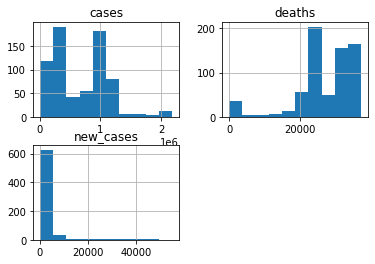

In [210]:
nyc_df_1.hist()

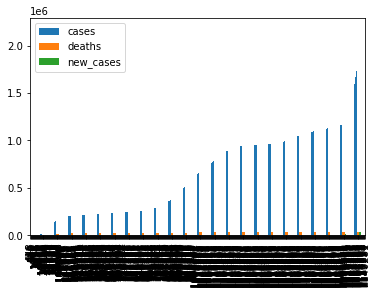

In [211]:
#simple bar graph visualization of cases
nyc_df_1.plot(kind='bar')

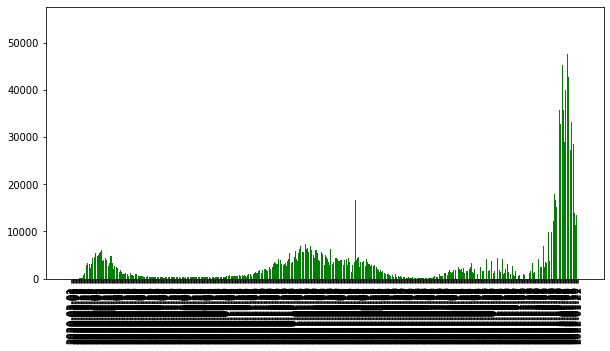

In [212]:
#visualization of new cases
plt.figure(figsize=(10,5))
plt.bar(x=nyc_df_1['date'], height=nyc_df_1['new_cases'], color='green')
plt.xticks(rotation=90)
plt.show()

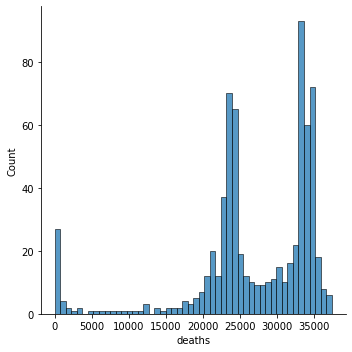

In [213]:
#seaborn visualization of deaths
sns.displot(nyc_df_1['deaths'], bins=50)

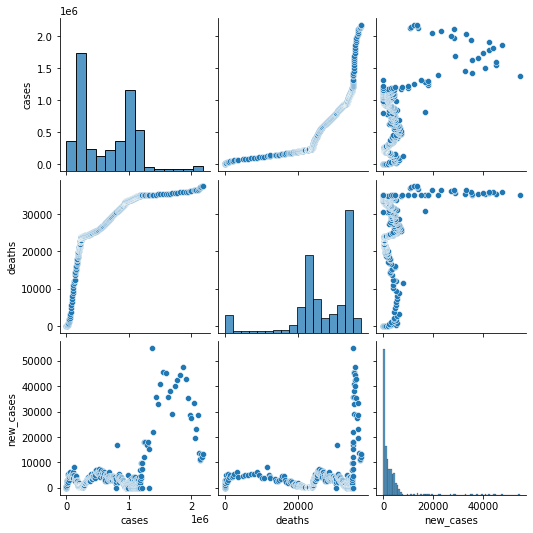

In [214]:
sns.pairplot(nyc_df_1)

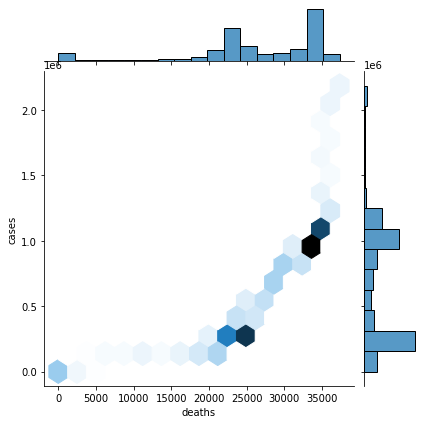

In [215]:
sns.jointplot(x='deaths',y='cases',data=nyc_df_1,kind='hex')

# Task4: Understand NY covid 19 data in last 30 days

In [216]:
#slice by last 30 days of data for each column
last30_nyc_cases = nyc_df_1['cases'][-30:]
last30_nyc_new_cases = nyc_df_1['new_cases'][-30:]
last30_nyc_dates = nyc_df_1['date'][-30:]

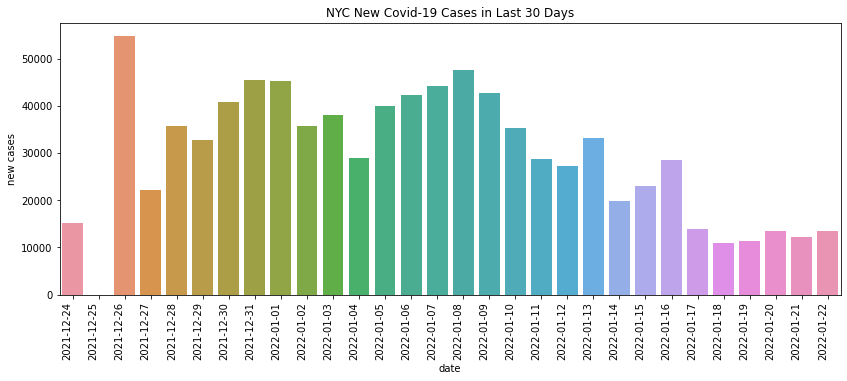

In [217]:
#visualize new cases in the last 30 days
plt.figure(figsize=(14, 5))
chart = sns.barplot(data=nyc_df_1,
            x = last30_nyc_dates,
            y = last30_nyc_new_cases,
            )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')


plt.title("NYC New Covid-19 Cases in Last 30 Days")
plt.ylabel("new cases")
plt.show()

In [218]:
#Same thing as new cases, due to cumulative count we want to see how many new deaths per day
new_deaths = nyc_df['deaths'].diff()
for index, row in nyc_df_1.iterrows():
  nyc_df_1.append(new_deaths)

In [219]:
#find number of new deaths in the last 30 days
nyc_df_1['new_deaths'] = new_deaths
last30_nyc_deaths = nyc_df_1['new_deaths'] [-30:]

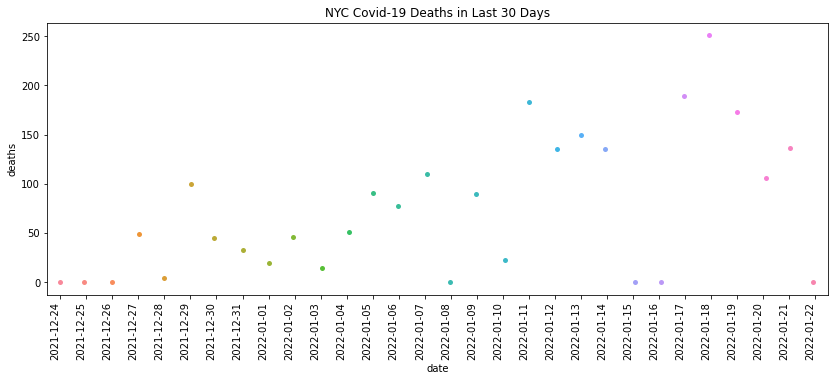

In [220]:
#Visualize deaths from Covid-19 in the last 30 days
plt.figure(figsize=(14, 5))
chart = sns.stripplot(data=nyc_df_1,
            x = last30_nyc_dates,
            y = last30_nyc_deaths,
            dodge=True,
            )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')


plt.title("NYC Covid-19 Deaths in Last 30 Days")
plt.ylabel("deaths")
plt.show()

# Comparing Covid 19 data with different states

In [221]:
states = ['New York','New Jersey','California','Florida','Arizona']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

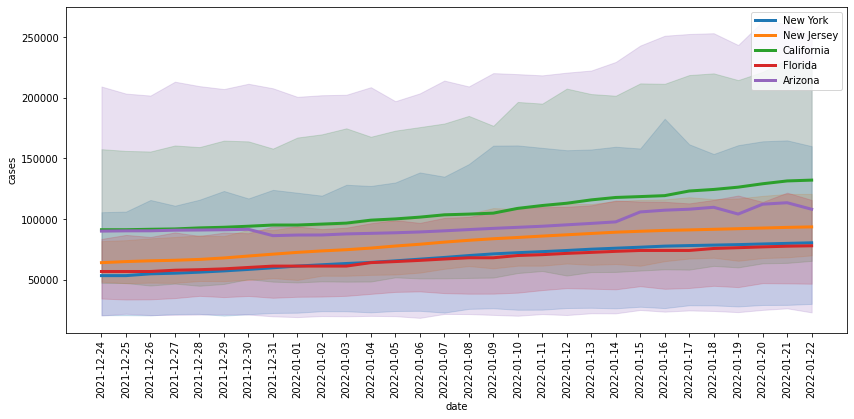

In [222]:
plt.figure(figsize=(14,6))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2021-12-24')]
  sns.lineplot(df_st['date'],
           df_st['cases'],
           linewidth=3,
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

Below are the conclusions:

 

1.   Conclusion 1
     -- The number of new cases in the last 30 days was the highest after December 25th, which makes sense because people tend to gather with family, friends, and loved ones during the Christmas holiday season and thus are most susceptible to being exposed to Covid-19 during this time. The higest number of deaths in a single day in the last 30 days was on January 18th, which is a day after the MLK holiday weekend. Based just on the trend from the last 30 days, it appears people tend to get sick the most around the holidays and the number of new deaths appear to rise too.

2.   Conclusion 2
     -- When comparing New York to other states like California, New Jersey, and Arizona in the last 30 days, New York's number of cases is lower. However, when comparing New York cases to Florida in the last 30 days, New York went from being lower in December to being slightly higher in January.

